# Data test runs

In [11]:
# Packages
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans

In [ ]:
#commented out code for creating the data.csv file

"""american = np.mean(np.load(r"one-speaker-vectors-master/american_speaker_01.files.npy"), axis=2)
australian = np.mean(np.load(r"one-speaker-vectors-master/australian_speaker_01.files.npy"), axis=2)
british = np.mean(np.load(r"one-speaker-vectors-master/british_speaker_01.files.npy"), axis=2)
indian = np.mean(np.load(r"one-speaker-vectors-master/indian_speaker_01.files.npy"), axis=2)
bangla = np.mean(np.load(r"one-speaker-vectors-master/bangla_speaker_01.files.npy"), axis=2)
malayalam = np.mean(np.load(r"one-speaker-vectors-master/malayalam_speaker_01.files.npy"), axis=2)
odiya = np.mean(np.load(r"one-speaker-vectors-master/odiya_speaker_01.files.npy"), axis=2)
telugu = np.mean(np.load(r"one-speaker-vectors-master/telugu_speaker_01.files.npy"), axis=2)
welsh = np.mean(np.load(r"one-speaker-vectors-master/welsh_speaker_01.files.npy"), axis=2)

american_df = pd.DataFrame(american)
american_df["label"] = "american"
australian_df = pd.DataFrame(australian)
australian_df["label"] = "australian"
british_df = pd.DataFrame(british)
british_df["label"] = "british"
indian_df = pd.DataFrame(indian)
indian_df["label"] = "indian"
bangla_df = pd.DataFrame(bangla)
bangla_df["label"] = "bangla"
malayalam_df = pd.DataFrame(malayalam)
malayalam_df["label"] = "malayalam"
odiya_df = pd.DataFrame(odiya)
odiya_df["label"] = "odiya"
telugu_df = pd.DataFrame(telugu)
telugu_df["label"] = "telugu"
welsh_df = pd.DataFrame(welsh)
welsh_df["label"] = "welsh"

data = pd.concat([american_df, australian_df, british_df, indian_df, bangla_df, malayalam_df, odiya_df, telugu_df, welsh_df], ignore_index=True)
data.to_csv("data.csv", index=True)"""
#stacked = np.vstack((american, australian, british, indian, bangla, malayalam, odiya, telugu, welsh))
#stacked.shape

'american = np.mean(np.load(r"one-speaker-vectors-master/american_speaker_01.files.npy"), axis=2)\naustralian = np.mean(np.load(r"one-speaker-vectors-master/australian_speaker_01.files.npy"), axis=2)\nbritish = np.mean(np.load(r"one-speaker-vectors-master/british_speaker_01.files.npy"), axis=2)\nindian = np.mean(np.load(r"one-speaker-vectors-master/indian_speaker_01.files.npy"), axis=2)\nbangla = np.mean(np.load(r"one-speaker-vectors-master/bangla_speaker_01.files.npy"), axis=2)\nmalayalam = np.mean(np.load(r"one-speaker-vectors-master/malayalam_speaker_01.files.npy"), axis=2)\nodiya = np.mean(np.load(r"one-speaker-vectors-master/odiya_speaker_01.files.npy"), axis=2)\ntelugu = np.mean(np.load(r"one-speaker-vectors-master/telugu_speaker_01.files.npy"), axis=2)\nwelsh = np.mean(np.load(r"one-speaker-vectors-master/welsh_speaker_01.files.npy"), axis=2)\n\namerican_df = pd.DataFrame(american)\namerican_df["label"] = "american"\naustralian_df = pd.DataFrame(australian)\naustralian_df["label

In [12]:
data = pd.read_csv("data.csv", index_col=0)
data.head(n=5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,label
0,-18.542814,-18.668093,-18.668093,-18.668093,-18.668093,-18.657626,-0.690188,5.438274,1.227493,4.616696,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
1,-17.233382,-17.358661,-17.358661,-17.358661,-17.358661,-16.581489,1.511105,5.112031,1.283484,4.130621,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
2,-18.296087,-18.421367,-18.421367,-18.421367,-18.421367,-18.421367,-16.046306,1.353363,3.334118,2.519160,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
3,-18.343959,-18.469239,-18.469239,-18.469239,-18.469239,-18.469216,-3.172947,2.963999,3.899948,2.573710,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
4,-16.493662,-16.618942,-16.618942,-16.618942,-16.618942,-16.618942,-15.462523,1.110224,2.803240,3.514306,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american


In [13]:
data.shape

(6752, 500)

In [14]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(data["label"])
encoder.classes_

array(['american', 'australian', 'bangla', 'british', 'indian',
       'malayalam', 'odiya', 'telugu', 'welsh'], dtype=object)

# t-SNE (my way)

In [15]:
pca = PCA(n_components=50, random_state=1216)
pca_data = pca.fit_transform(data.iloc[:, :-1])

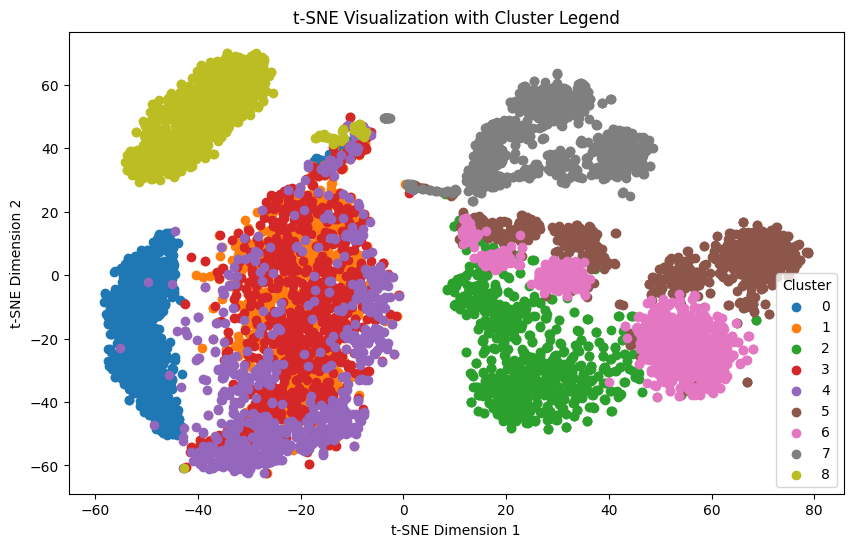

In [16]:
tsne = TSNE(n_components=2, random_state=1216)
tsne_data = tsne.fit_transform(pca_data)

# Get unique labels
unique_labels = list(set(labels_encoded))

# Plot each cluster separately with a different color
plt.figure(figsize=(10, 6))
for label in unique_labels:
    plt.scatter(tsne_data[labels_encoded == label, 0], tsne_data[labels_encoded == label, 1], label=label)

plt.title('t-SNE Visualization with Cluster Legend')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=1216)
tsne_data = tsne.fit_transform(pca_data)
#usually takes 16 seconds



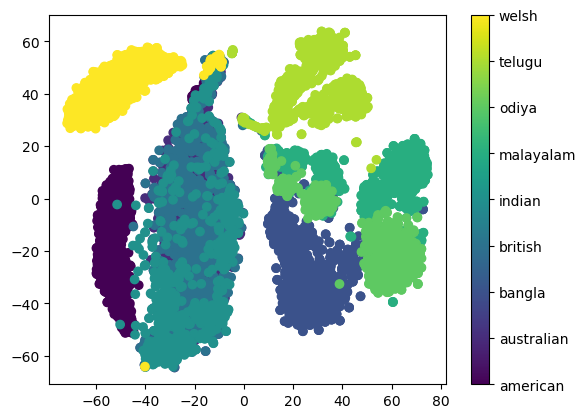

In [ ]:
plot = plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels_encoded)
color_bar = plt.colorbar(plot, ticks=range(9))
color_bar.ax.set_yticklabels(encoder.classes_.tolist())
plt.show()


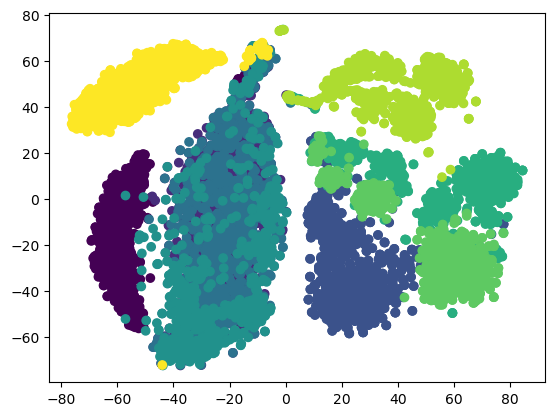

In [ ]:
tsne_perp20 = TSNE(n_components=2, perplexity=20, random_state=1216)
tsne_data_perp20 = tsne_perp20.fit_transform(pca_data)
plt.scatter(tsne_data_perp20[:, 0], tsne_data_perp20[:, 1], c=labels_encoded)
plt.show()

# UMAP

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


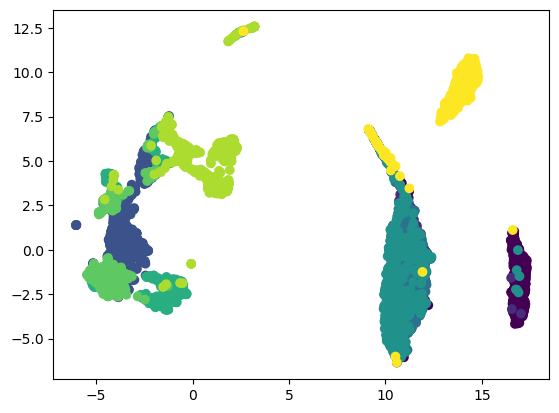

In [ ]:
umap5 = UMAP(min_dist=0.1, n_neighbors=5, metric="euclidean", random_state=1216)
umap_data5 = umap5.fit_transform(X)
plt.scatter(umap_data5[:, 0], umap_data5[:, 1], c=labels_encoded)
plt.show()

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


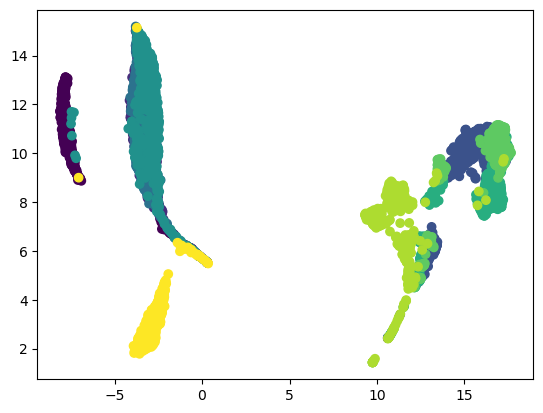

In [ ]:
umap10 = UMAP(min_dist=0.1, n_neighbors=10, metric="euclidean", random_state=1216)
umap_data10 = umap10.fit_transform(X)
plt.scatter(umap_data10[:, 0], umap_data10[:, 1], c=labels_encoded)
plt.show()

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


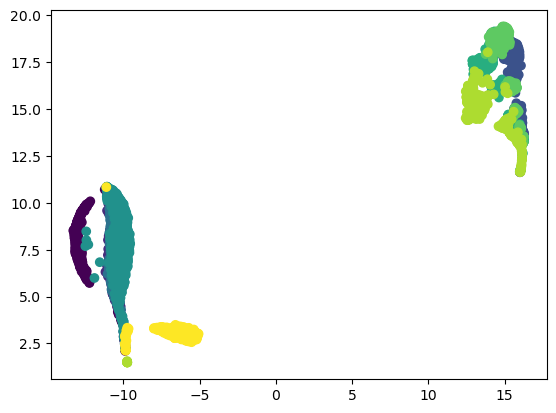

In [ ]:
umap40 = UMAP(min_dist=0.1, n_neighbors=40, metric="euclidean", random_state=1216)
umap_data40 = umap40.fit_transform(X)
plt.scatter(umap_data40[:, 0], umap_data40[:, 1], c=labels_encoded)
plt.show()

## Hierarchical clustering?

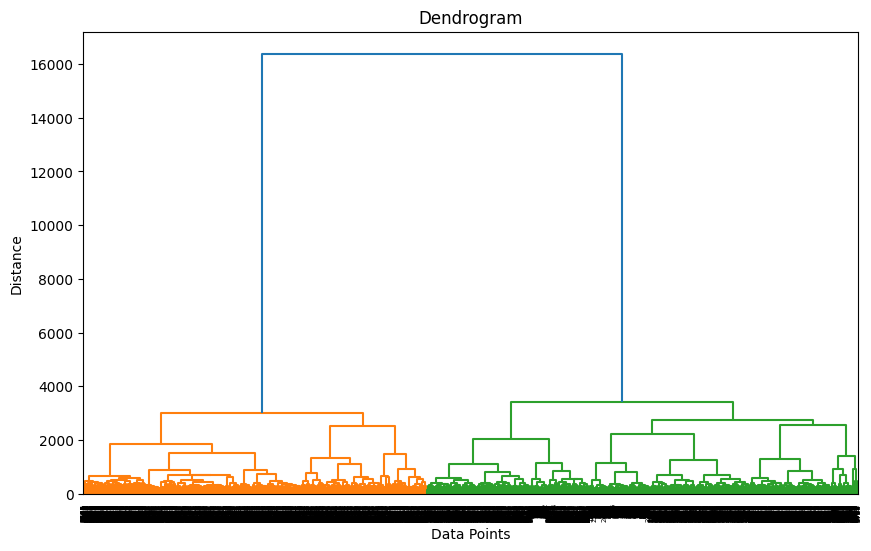

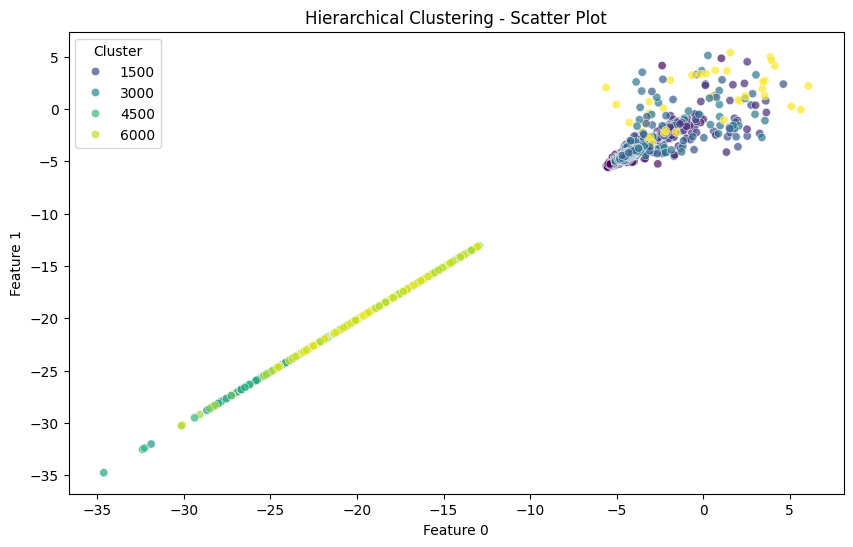

In [17]:
X = data.iloc[:, :-1]

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Determine clusters
max_d = 100  # maximum distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Add cluster labels to the dataframe
data['cluster'] = clusters

# Visualize clusters in a scatter plot (using first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='cluster', palette='viridis', alpha=0.7)
plt.title('Hierarchical Clustering - Scatter Plot')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.show()

0.3405424
0.4820480420309084


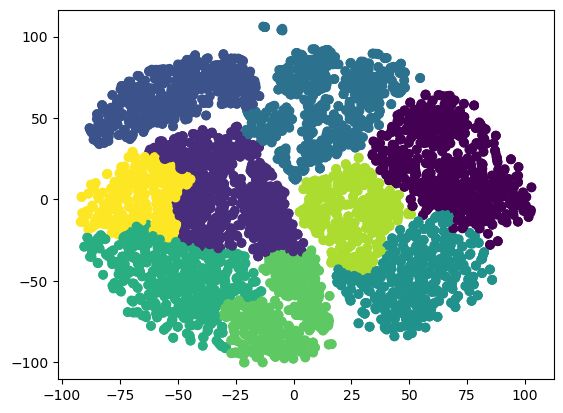

In [ ]:
aggClustering = AgglomerativeClustering(n_clusters=9, linkage="ward").fit_predict(X)
print(silhouette_score(X, aggClustering))
print(adjusted_rand_score(labels_encoded, aggClustering))
plt.scatter(X[:, 0], X[:, 1], c=aggClustering)
plt.show()

## PCA clustering

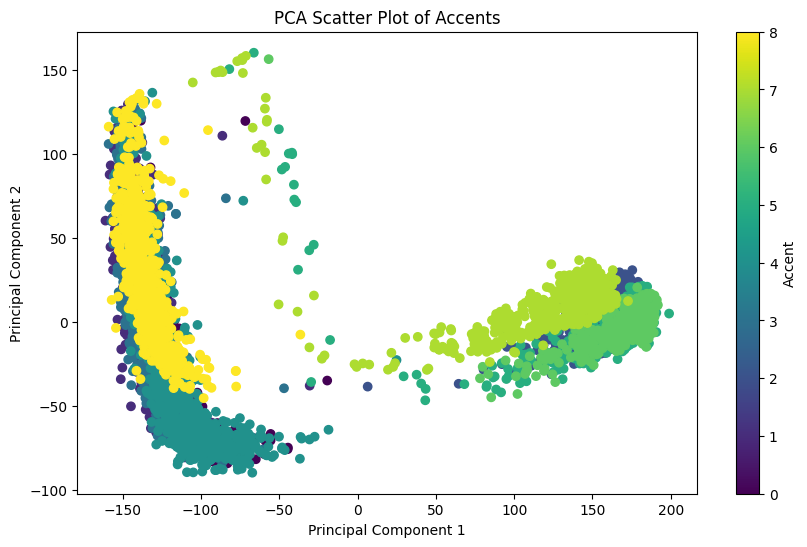

In [20]:
X = data.iloc[:, :499]

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Extract labels
labels = data['label']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels.astype('category').cat.codes, cmap='viridis')
plt.title('PCA Scatter Plot of Accents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Accent')
plt.show()

## Spectral clustering

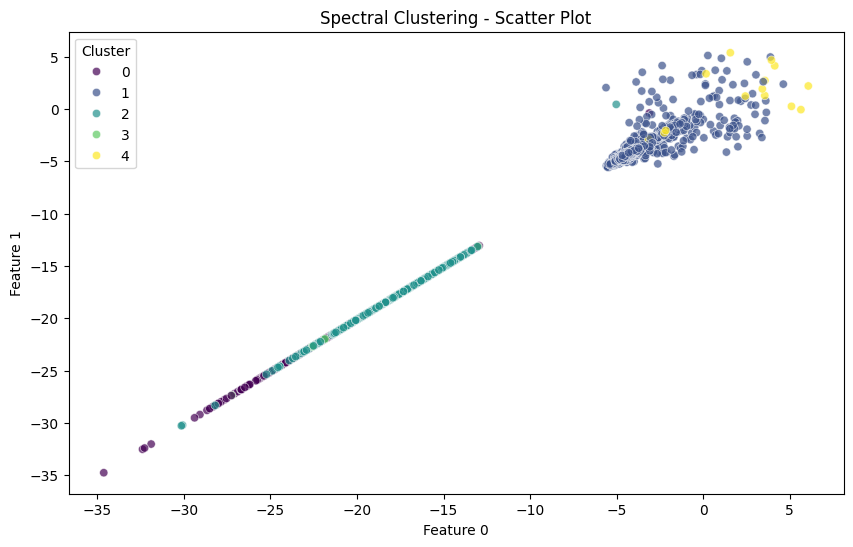

In [21]:
X = data.iloc[:, :499]

# Perform spectral clustering
n_clusters = 5  # number of clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
clusters = spectral.fit_predict(X)

# Add cluster labels to the dataframe
data['cluster'] = clusters

# Visualize clusters in a scatter plot (using first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='cluster', palette='viridis', alpha=0.7)
plt.title('Spectral Clustering - Scatter Plot')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.show()

In [ ]:
specCluster = SpectralClustering(n_clusters=9).fit_predict(X)
print(silhouette_score(X, specCluster))
print(adjusted_rand_score(labels_encoded, specCluster))
plt.scatter(X[:, 0], X[:, 1], c=specCluster)
plt.show()
#took too long to get result 

KeyboardInterrupt: 

## DBSCAN

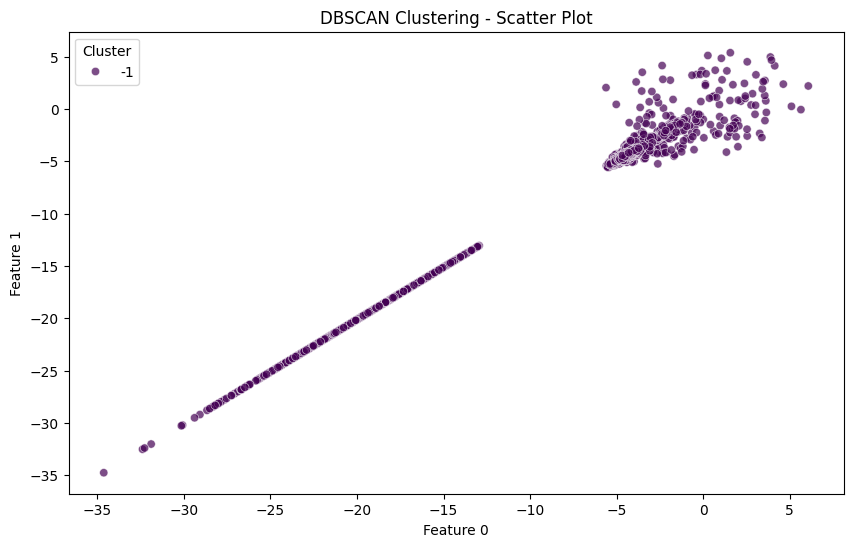

In [22]:
data_numeric = data.select_dtypes(include=[np.number])

# Perform DBSCAN clustering
eps = 0.5  # maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # minimum number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(data_numeric)

# Visualize clusters in a scatter plot (using first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_numeric.iloc[:, 0], y=data_numeric.iloc[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering - Scatter Plot')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.show()

-0.17657778
-2.2144130323678512e-05


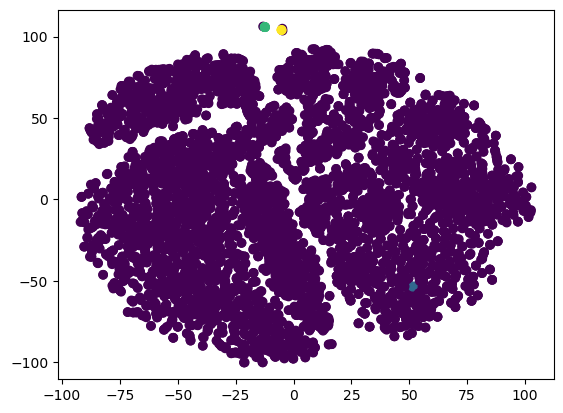

In [ ]:
dbscan = DBSCAN().fit_predict(X)
print(silhouette_score(X, dbscan))
print(adjusted_rand_score(labels_encoded, dbscan))
plt.scatter(X[:, 0], X[:, 1], c=dbscan)
plt.show()

## GMM

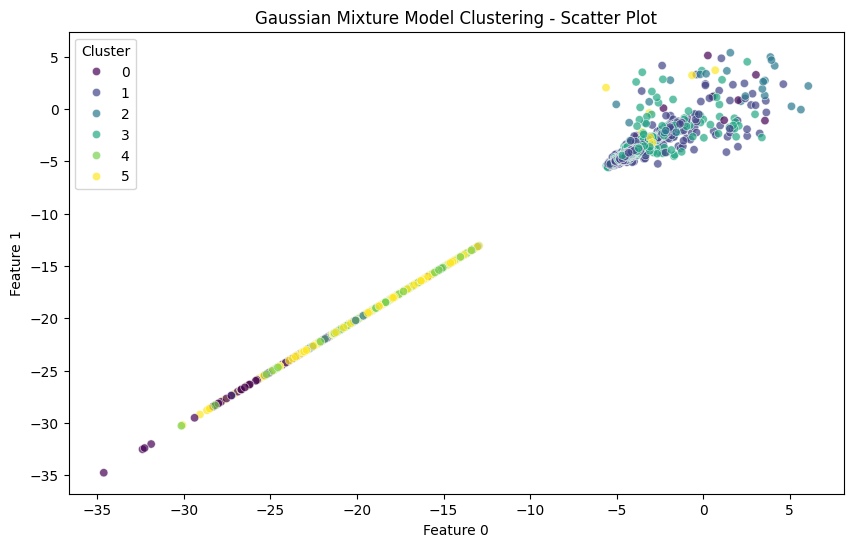

In [28]:
x_data = data.iloc[:, :499]

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=6, random_state=42)
clusters = gmm.fit_predict(x_data)

# Add cluster labels to the dataframe
data['cluster'] = clusters

# Visualize clusters in a scatter plot (using first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='cluster', palette='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model Clustering - Scatter Plot')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.show()

## KMeans

/Users/alexavndra/miniforge3/envs/COGS118B_WI24/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


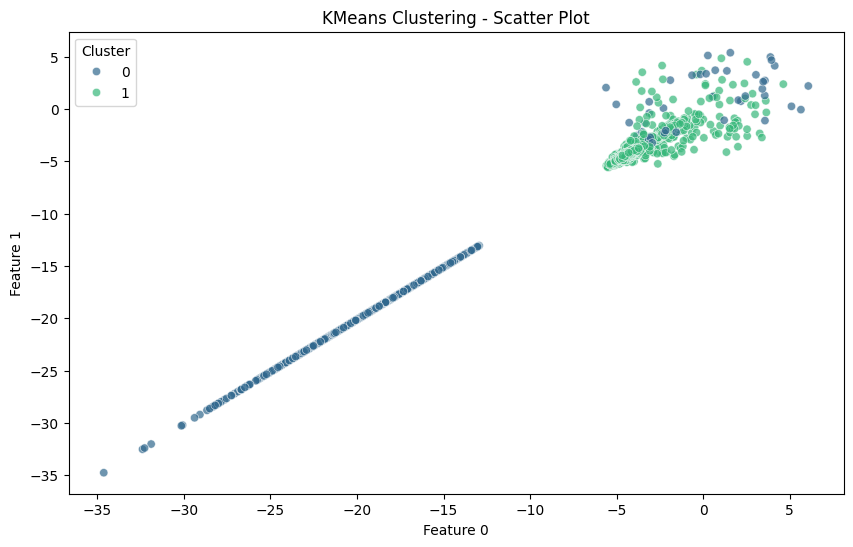

In [33]:
X = data.iloc[:, :499]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=1216)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
data['cluster'] = clusters

# Visualize clusters in a scatter plot (using first two features for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='cluster', palette='viridis', alpha=0.7)
plt.title('KMeans Clustering - Scatter Plot')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(title='Cluster')
plt.show()

## Regular stuff

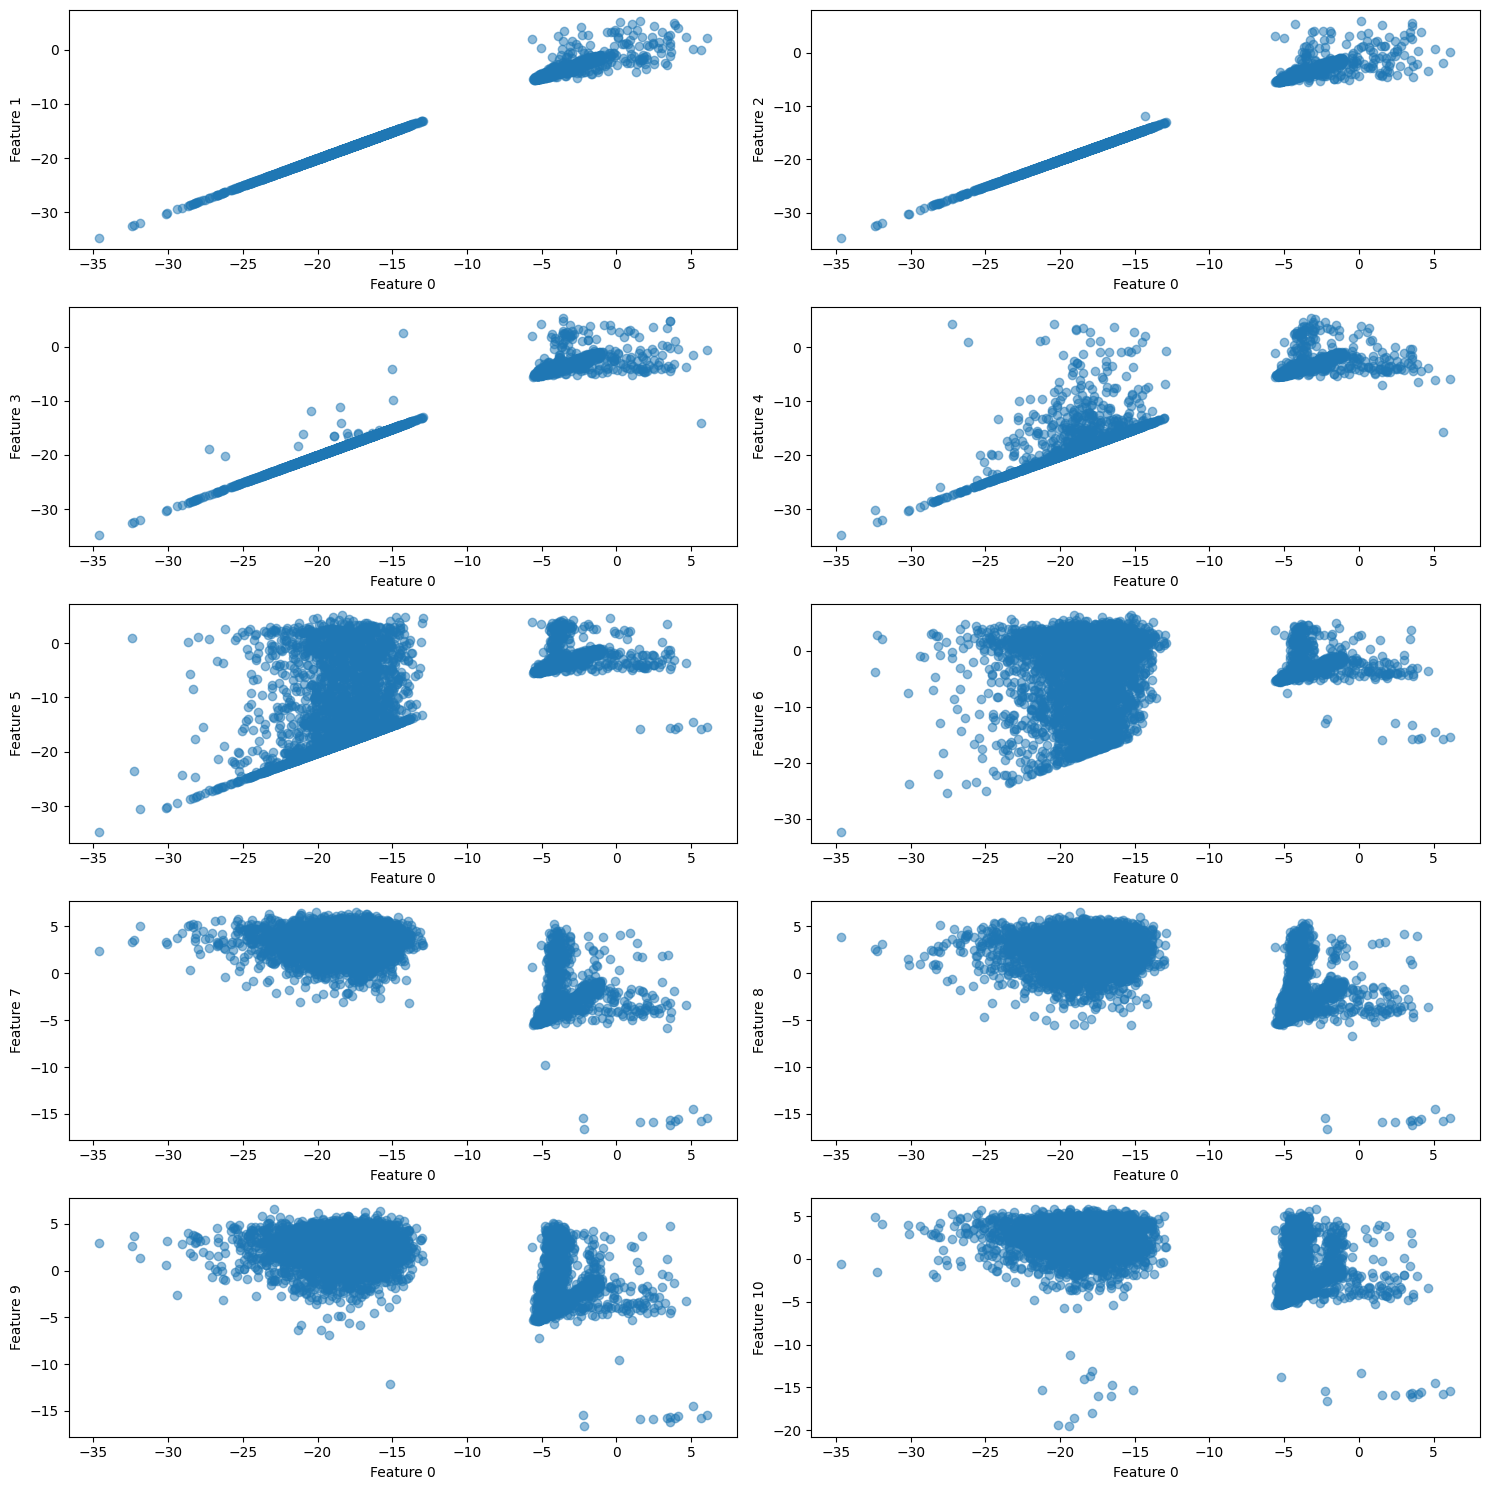

In [5]:
X = data.iloc[:, :-1]

# Generate scatter plots for pairs of features
num_features = X.shape[1]
num_plots = min(num_features * (num_features - 1) // 2, 10)  # Limit to 10 plots for visualization
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, 15))
axes = axes.flatten()

for i in range(num_plots):
    feature1_idx = i // (num_features - 1)
    feature2_idx = i % (num_features - 1) + 1
    axes[i].scatter(X.iloc[:, feature1_idx], X.iloc[:, feature2_idx], alpha=0.5)
    axes[i].set_xlabel(f"Feature {feature1_idx}")
    axes[i].set_ylabel(f"Feature {feature2_idx}")

plt.tight_layout()
plt.show()